# INFORMACIÓN DEL PROYECTO

## El viaje del usuario: ¿Qué factores influyen en la conversión de trial a premium?
### Análisis sobre las razones que hay detrás de la conversión en un modelo de suscripción


## Introducción

### Análisis del Comportamiento de los Usuarios

Este proyecto tiene como finalidad analizar el comportamiento de los usuarios de una app, especialmente en relación con el abandono al finalizar la prueba gratuita de 7 días.

A través de técnicas de **Análisis Exploratorio de Datos (EDA)**, se investigarán las tasas de retención y las razones subyacentes al abandono en este punto. Este análisis proporcionará información valiosa para:

- Mejorar las estrategias de retención.
- Optimizar la experiencia del usuario.
- Reducir la tasa de abandono.

### Objetivos

El principal objetivo es incrementar la tasa de conversión de prueba a suscripción premium, aumentando la permanencia de los usuarios y optimizando las métricas clave de la aplicación. Para ello, se busca:

Identificar patrones de comportamiento que diferencian a los usuarios que se convierten de aquellos que abandonan.

Detectar puntos críticos dentro del viaje del usuario que influyen en la decisión de cancelar o continuar.

Proponer estrategias basadas en datos para mejorar la conversión y fidelización.

### Hipótesis

- Examinar si los usuarios que seleccionan diferentes razones para usar la app tienen tasas de conversión distintas.

- Los usuarios que completan todas las pantallas de incorporación (ONBOARDING COMPLETED) tienen una tasa de conversión a una suscripción de pago (TRIAL_CONVERTED) más alta que aquellos que no completan el onboarding

- La falta de interacción durante el trial de 7 días es directamente proporcional con la cancelación.

- Los usuarios que se registran desde ciertos países tienen una tasa de conversión más alta a la suscripción de pago (TRIAL_CONVERTED) que aquellos que se registran desde otros países.(Evaluar si las tasas de conversión son consistentes en todos los países, identificando posibles diferencias regionales)

-  Los usuarios que provienen de canales de marketing orgánicos tienen mayor probabilidad de conversión.

- Los usuarios que suben una foto (PHOTO_UPLOADED) tienen una tasa de conversión más alta a suscripción de pago que aquellos que no suben una foto

- Los usuarios que han abierto y respondido una conversación (CONVERSATION_OPENED y CONVERSATION_ANSWERED) tienen una tasa de conversión más alta a una suscripción de pago (TRIAL_CONVERTED) en comparación con aquellos que no han abierto ni respondido conversaciones

- Día de la semana con mayor número de descargas de la aplicación.

- Análisis de los usuarios según su país de procedencia y los canales que utilizan para acceder a la aplicación.

***

In [24]:
# 1. Importa pandas, pyplot y seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency
import plotly.express as px
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import plotly.graph_objects as go
from scipy.stats import pearsonr


In [25]:
# guarda en variables los datasets y su fuente
df = pd.read_csv("data/dataset_eda.csv")
df

,USER ID,FIRST SEEN TIMESTAMP,COUNTRY,ATTRIBUTION CHANNEL,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,...,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
0,gnm6qjiAY2e7sBejh7EiQBpWZBJ3,2024-03-04T03:07:29.201Z,United States,Organic,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,1,1
1,Wlt9juveBehuBlKKVWgR3qkEVV52,2024-03-04T02:31:26.549Z,United States,Google Ads,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
2,ir27ubxNhoYwQwXO0eK6zYq9mAJ3,2024-03-04T06:16:04.500Z,United States,Google Ads,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,x837S9H2ufbRZXGUZ2jUmZq2oLf2,2024-03-04T11:00:36.658Z,Australia,Organic,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,wDisQWuU6cNbgLCpV1ZaVP7VVRA2,2024-03-04T12:30:44.841Z,South Africa,Organic,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,QtRTNhGrHROn023en6jPxaFspGK2,2024-03-12T00:37:27.297Z,United States,Google Ads,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,1
39996,5Af9WqbmihfeMUaQZAf6xF376Dd2,2024-03-12T01:00:11.388Z,United States,Partner Invite,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
39997,3Q7KCKy2kcSqJ1HX3wLdyu9YlAf2,2024-03-12T01:33:18.550Z,United States,Partner Invite,1,0,0,1,0,1,...,0,1,1,1,1,1,1,1,1,1
39998,fAOJQ2q8ahVOSoRcXXY9U3Gwm393,2024-03-12T01:47:06.804Z,United States,Google Ads,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


## Diccionario columnas Dataset:

- USER ID: Este es un identificador único de un usuario.
- FIRST SEEN TIMESTAMP: Marca de tiempo en GMT de cuándo vimos por primera vez al usuario en nuestra plataforma.
- COUNTRY: País desde el cual el usuario se registró.
- ATTRIBUTION CHANNEL: Canal de marketing que utilizó el usuario para obtener la app. "Partner invite" significa que el usuario llegó por invitación de su pareja. "Organic" significa que el usuario no llegó a través de un canal específico, sino que fue directamente a la tienda de aplicaciones y descargó la app sin interactuar con ningún canal de marketing.
- SIGNUP: Boolenao que indica si el usuario completó el registro.
- ENGAGED WITH PAIRING: Booleano que indica si el usuario interactuó con la pantalla de emparejamiento durante la incorporación (emparejamiento significa el proceso de invitar a tu pareja a la app).
- CODE_SHARED: Booleano que indica si el usuario compartió su código con su pareja.
- PAIRED_SECOND: Booleano  que indica si el usuario se emparejó con éxito con su pareja como el invitado a la plataforma.
- PAIRED_INITIATOR: Booleano  que indica si el usuario se emparejó con éxito con su pareja como el que invitó a su pareja a la plataforma.
- ONBOARDING_COMPLETED: Booleano que indica si el usuario ha completado con éxito todas las pantallas de incorporación. Los usuarios no deberían poder responder ni abrir conversaciones antes de que se complete este paso.
- CONVERSATION_OPENED: Booleano  que indica si el usuario ha abierto una conversación.
- CONVERSATION_ANSWERED: Booleano  que indica si el usuario ha respondido una conversación.
- PHOTO_UPLOADED: Booleano  que indica si el usuario ha subido una foto.
- TRIAL_STARTED: Booleano  que indica si el usuario ha comenzado una prueba gratuita.
- TRIAL_CONVERTED: Booleano  que indica si el usuario se ha convertido a una suscripción de pago después de la prueba gratuita.
- COMMUNICATION_REASON: Booleano que indica si la persona se registró o interactuó con la plataforma para mejorar su comunicación en pareja.
- CONFLICT_REASON: Booleano que indica que el usuario tiene conflictos o está atravesando situaciones difíciles y le gustaría mejorar ese aspecto.
- CONNECTION_REASON: Booleano que refleja la búsqueda de conexión emocional o interpersonal, como sentirse más conectado con los demás.
- FAMILY_AND_FRIENDS_REASON:Booleano que indica si el motivo principal del usuario está relacionado con problemas o metas personales con familia o amigos.
- FUN_AND_EXCITEMENT_REASON: Booleano apunta a quienes buscan experiencias divertidas, nuevas o emocionantes dentro de la plataforma (quizás como distracción o recreación).
- HOME_AND_WORK_REASON: Relacionada con tensiones o metas en el hogar o el trabajo: conciliación, estrés laboral, rutinas familiares, etc.
- MEANING_AND_GROWTH_REASON: Booleano que indica que el usuario busca un propósito de tipo crecimiento personal, reflexión o autoconocimiento.
- MONEY_AND_FINANCES_REASON: Booleano que el usuario elige si tiene inquietudes económicas.
- SEX_AND_INTIMACY_REASON:Booleano que apunta a una vinculación a temas sexuales, afectivos o de intimidad.


In [38]:
df.head()

,USER ID,FIRST SEEN TIMESTAMP,COUNTRY,ATTRIBUTION CHANNEL,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,...,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
0,gnm6qjiAY2e7sBejh7EiQBpWZBJ3,2024-03-04T03:07:29.201Z,United States,Organic,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,1,1
1,Wlt9juveBehuBlKKVWgR3qkEVV52,2024-03-04T02:31:26.549Z,United States,Google Ads,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
2,ir27ubxNhoYwQwXO0eK6zYq9mAJ3,2024-03-04T06:16:04.500Z,United States,Google Ads,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,x837S9H2ufbRZXGUZ2jUmZq2oLf2,2024-03-04T11:00:36.658Z,Australia,Organic,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,wDisQWuU6cNbgLCpV1ZaVP7VVRA2,2024-03-04T12:30:44.841Z,South Africa,Organic,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   USER ID                    40000 non-null  object
 1   FIRST SEEN TIMESTAMP       40000 non-null  object
 2   COUNTRY                    40000 non-null  object
 3   ATTRIBUTION CHANNEL        40000 non-null  object
 4   SIGNUP                     40000 non-null  int64 
 5   ENGAGED_WITH_PAIRING       40000 non-null  int64 
 6   CODE_SHARED                40000 non-null  int64 
 7   PAIRED_SECOND              40000 non-null  int64 
 8   PAIRED_INITIATOR           40000 non-null  int64 
 9   ONBOARDING_COMPLETED       40000 non-null  int64 
 10  CONVERSATION_OPENED        40000 non-null  int64 
 11  CONVERSATION_ANSWERED      40000 non-null  int64 
 12  PHOTO_UPLOADED             40000 non-null  int64 
 13  TRIAL_STARTED              40000 non-null  int64 
 14  TRIAL_

In [12]:
df.describe()

,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,CONVERSATION_OPENED,CONVERSATION_ANSWERED,PHOTO_UPLOADED,TRIAL_STARTED,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
count,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.0,0.636700,0.385750,0.352375,0.265600,0.828175,0.630400,0.551975,0.620550,0.143275,0.033675,0.632250,0.439250,0.643100,0.264525,0.564775,0.297125,0.504450,0.271300,0.533825
std,0.0,0.480956,0.486778,0.477716,0.441658,0.377233,0.482702,0.497297,0.485256,0.350357,0.180393,0.482199,0.496302,0.479091,0.441085,0.495793,0.456998,0.499986,0.444636,0.498861
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# cuantos usuarios hay en todo el dataset

total_usuarios = df['USER ID'].nunique()

total_usuarios = len(df)

print(f"Total de usuarios: {total_usuarios}")

Total de usuarios: 40000


# Usuarios que empiezan el trial y los que convierten
#

### hipótesis usuarios que convierten en mayor proporción

C:\Users\nsara\AppData\Local\Temp\ipykernel_13504\2911705104.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")


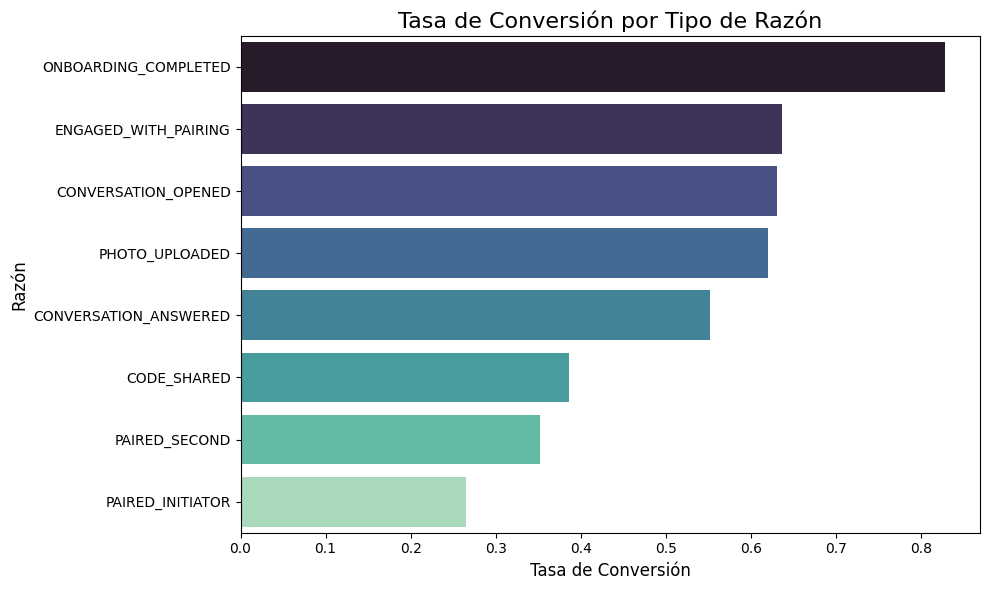

El ratio de conversión total (al menos una razón seleccionada) es: 0.96


In [47]:
# Lista de columnas con razones
reason_cols = [
    "PAIRED_INITIATOR",
    "PAIRED_SECOND",
    "PHOTO_UPLOADED",
    "CONVERSATION_ANSWERED",
    "ONBOARDING_COMPLETED",
    "CODE_SHARED",
    "CONVERSATION_OPENED",
    "ENGAGED_WITH_PAIRING"
]

### Ratio de conversión

# Calcular la tasa de conversión para cada razón
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]

# Ordenar las razones por la tasa de conversión de mayor a menor
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)

# Graficar las tasas de conversión
plt.figure(figsize=(10, 6))
sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")
plt.title("Tasa de Conversión por Tipo de Razón", fontsize=16)
plt.xlabel("Tasa de Conversión", fontsize=12)
plt.ylabel("Razón", fontsize=12)
plt.tight_layout()
plt.show()

# Calcular el ratio de conversión total: usuarios que seleccionaron al menos una razón
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

print(f"El ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}")


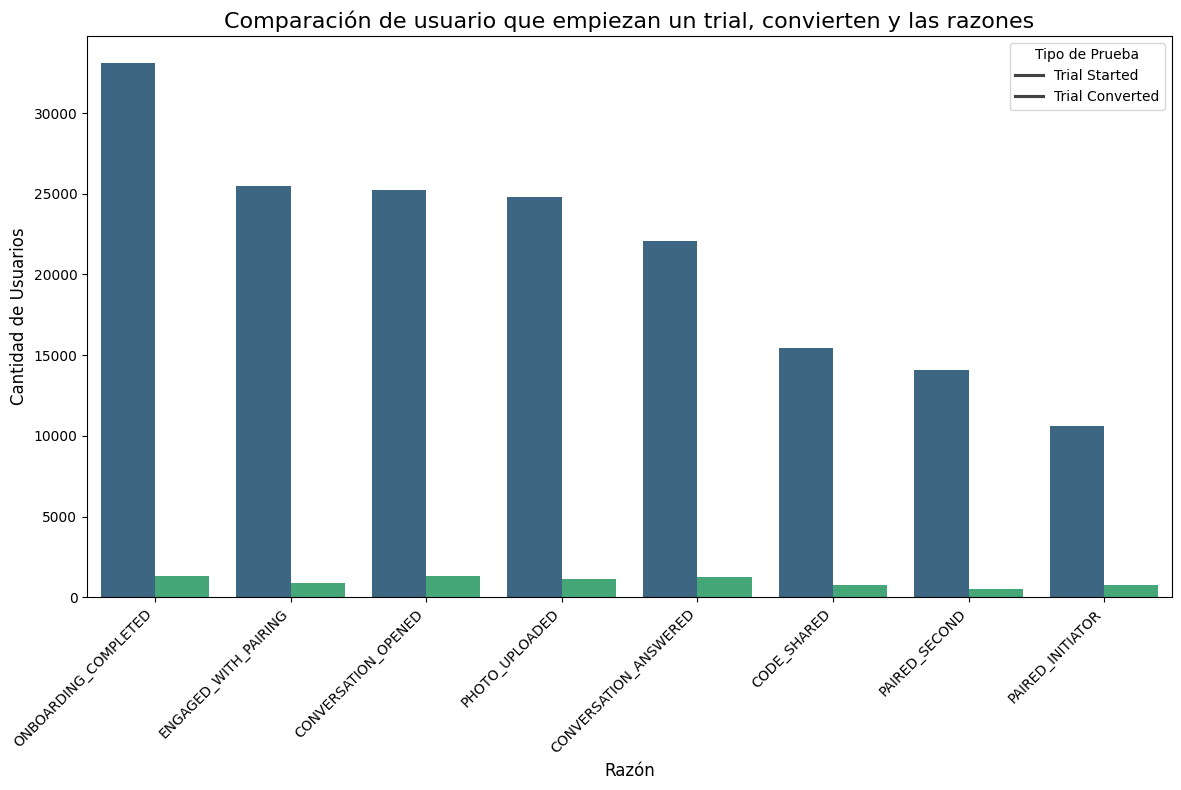

In [54]:
# Lista de columnas con razones
reason_cols = [
    "PAIRED_INITIATOR",
    "PAIRED_SECOND",
    "PHOTO_UPLOADED",
    "CONVERSATION_ANSWERED",
    "ONBOARDING_COMPLETED",
    "CODE_SHARED",
    "CONVERSATION_OPENED",
    "ENGAGED_WITH_PAIRING"
]

### Calcular las tasas de conversión por razón

# Calcular el total de "TRIAL_STARTED" y "TRIAL_CONVERTED" para cada razón
trial_started = df[reason_cols].sum(axis=0).reset_index()
trial_started.columns = ["Reason", "Trial Started"]

# Calcular el total de "TRIAL_CONVERTED" para cada razón
trial_converted = df[reason_cols].apply(lambda x: df["TRIAL_CONVERTED"][x == 1].sum()).reset_index()
trial_converted.columns = ["Reason", "Trial Converted"]

# Unir los DataFrames de "Trial Started" y "Trial Converted"
combined = pd.merge(trial_started, trial_converted, on="Reason")

# Calcular la tasa de conversión para cada razón (Trial Converted / Trial Started)
combined["Conversion Rate"] = combined["Trial Converted"] / combined["Trial Started"]

# Ordenar por la cantidad de usuarios de "Trial Started" de mayor a menor (o por "Trial Converted" si prefieres)
combined = combined.sort_values(by="Trial Started", ascending=False)

# Convertir a formato largo para graficar (melt)
combined_melted = combined.melt(id_vars="Reason", value_vars=["Trial Started", "Trial Converted"],
                                 var_name="Trial Type", value_name="Count")

# Graficar las barras verticales, ordenadas de mayor a menor
plt.figure(figsize=(12, 8))
sns.barplot(x="Reason", y="Count", hue="Trial Type", data=combined_melted, palette="viridis")

# Ajustar la leyenda para que no se muestre la "Conversion Rate"
plt.legend(title='Tipo de Prueba', loc='upper right', labels=["Trial Started", "Trial Converted"])

# Personalizar la gráfica
plt.title("Comparación de usuario que empiezan un trial, convierten y las razones", fontsize=16)
plt.ylabel("Cantidad de Usuarios", fontsize=12)
plt.xlabel("Razón", fontsize=12)

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha="right")

plt.tight_layout()

# Mostrar el gráfico
plt.show()

# # Calcular el ratio de conversión total (usuarios que seleccionaron al menos una razón)
# total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

# # Mostrar el ratio de conversión total
# print(f"El ratio de conversión total es: {total_conversion:.2f}")


### Los que más convierten son los usuarios que realizan el onboarding_completed

### Hipótesis 

In [14]:
# Hipótesis 1:
# Columnas relevantes:
# TRIAL_CONVERTED: Indica si el usuario convirtió (1) o no (0).
# Problema:Cada usuario puede haber seleccionado múltiples razones, ya que las razones 
# están en columnas separadas con valores 0 o 1.

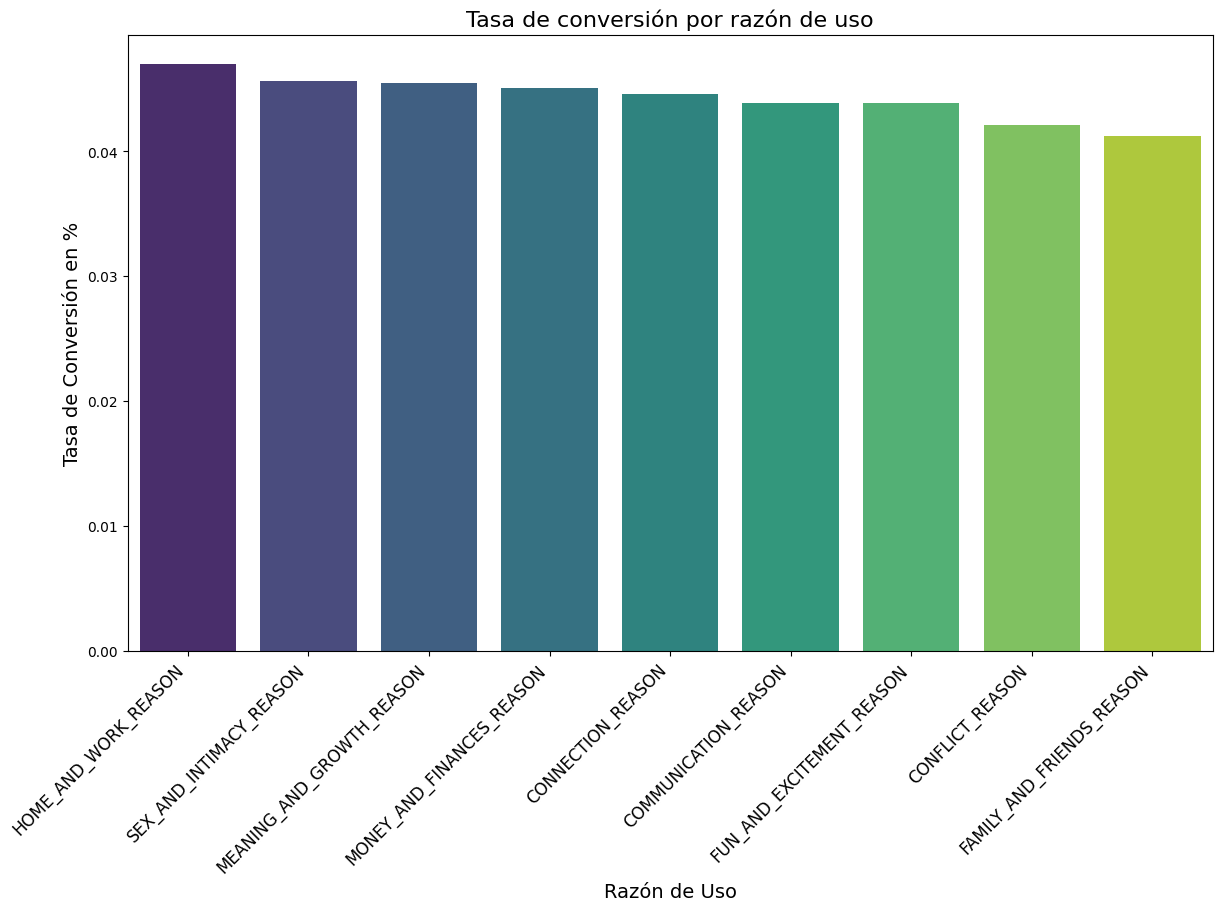

In [42]:
# Hipótesis 1, Examinar si los usuarios que seleccionan diferentes razones para usar la app tienen tasas de conversión distintas.
# Datos clave necesarios:
# ID del usuario.
# Razón seleccionada para usar la app.
# Estado de conversión (1 = convertido, 0 = no convertido).
# Fecha de selección de la razón y fecha de conversión (si aplica).



# Definir columnas de razones
razones_cols = [
    "COMMUNICATION_REASON", "CONFLICT_REASON", "CONNECTION_REASON", 
    "FAMILY_AND_FRIENDS_REASON", "FUN_AND_EXCITEMENT_REASON", "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON", "MONEY_AND_FINANCES_REASON", "SEX_AND_INTIMACY_REASON"
]

# Transformar el dataset: Crear una columna con la razón principal de cada usuario
df_melted = df.melt(id_vars=["USER ID", "TRIAL_CONVERTED"], 
                     value_vars=razones_cols, 
                     var_name="razon", value_name="selected")

# Filtrar solo las razones seleccionadas (selected = 1)
df_melted = df_melted[df_melted["selected"] == 1].drop(columns=["selected"])

# Renombrar columnas para que coincidan con el código original
df_melted = df_melted.rename(columns={"TRIAL_CONVERTED": "conversion"})

# Calcular tasas de conversión
conversion_rates = df_melted.groupby("razon")["conversion"].mean().reset_index()

plt.figure(figsize=(14,8))  # Tamaño más grande

# Ordenar de mayor a menor
conversion_rates = conversion_rates.sort_values(by="conversion", ascending=False)

# Crear el gráfico de barras ordenado
sns.barplot(x="razon", y="conversion", hue="razon", data=conversion_rates, palette="viridis", legend=False)

# Mejorar etiquetas y título
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Tasa de Conversión en %", fontsize=14)
plt.xlabel("Razón de Uso", fontsize=14)
plt.title("Tasa de conversión por razón de uso", fontsize=16)

plt.show()







#### Apenas se aprecia diferencia, pero la razón principal es home and work reason.

In [16]:
# Ahora quiero saber cuantas razones selecciona cada usuario. ¿Cuántas se pueden seeccionar?¿es un dato irrelevante?
# Crear la columna con el número de razones seleccionadas




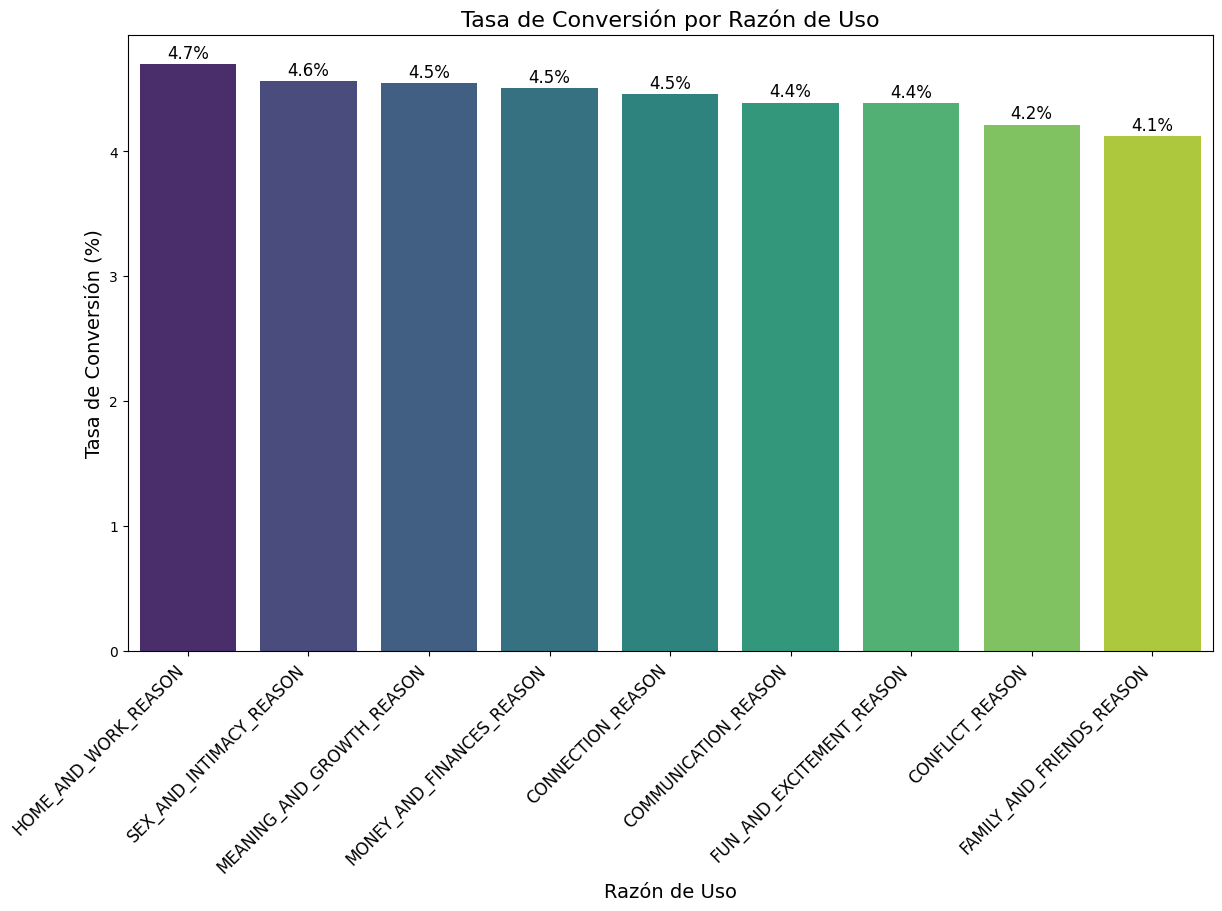

In [43]:
# Definir columnas de razones
razones_cols = [
    "COMMUNICATION_REASON", "CONFLICT_REASON", "CONNECTION_REASON", 
    "FAMILY_AND_FRIENDS_REASON", "FUN_AND_EXCITEMENT_REASON", "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON", "MONEY_AND_FINANCES_REASON", "SEX_AND_INTIMACY_REASON"
]

# Transformar el dataset: Crear una columna con la razón principal de cada usuario
df_melted = df.melt(id_vars=["USER ID", "TRIAL_CONVERTED"], 
                     value_vars=razones_cols, 
                     var_name="razon", value_name="selected")

# Filtrar solo las razones seleccionadas (selected = 1)
df_melted = df_melted[df_melted["selected"] == 1].drop(columns=["selected"])

# Renombrar columnas para que coincidan con el código original
df_melted = df_melted.rename(columns={"TRIAL_CONVERTED": "conversion"})

# Calcular tasas de conversión
conversion_rates = df_melted.groupby("razon")["conversion"].mean().reset_index()

# Multiplicar las tasas de conversión por 100 para obtener porcentajes
conversion_rates["conversion"] = conversion_rates["conversion"] * 100

# Ordenar de mayor a menor
conversion_rates = conversion_rates.sort_values(by="conversion", ascending=False)

plt.figure(figsize=(14, 8))  # Tamaño más grande

# Crear el gráfico de barras ordenado
sns.barplot(x="razon", y="conversion", hue="razon", data=conversion_rates, palette="viridis", legend=False)

# Mejorar etiquetas y título
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Tasa de Conversión (%)", fontsize=14)
plt.xlabel("Razón de Uso", fontsize=14)
plt.title("Tasa de Conversión por Razón de Uso", fontsize=16)

# Agregar etiquetas de porcentaje sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')

plt.show()


### prueba Proporción de Usuarios por Tipo de Razón

C:\Users\nsara\AppData\Local\Temp\ipykernel_13504\1079772214.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Reason", x="Proportion", data=reason_counts, palette="mako")


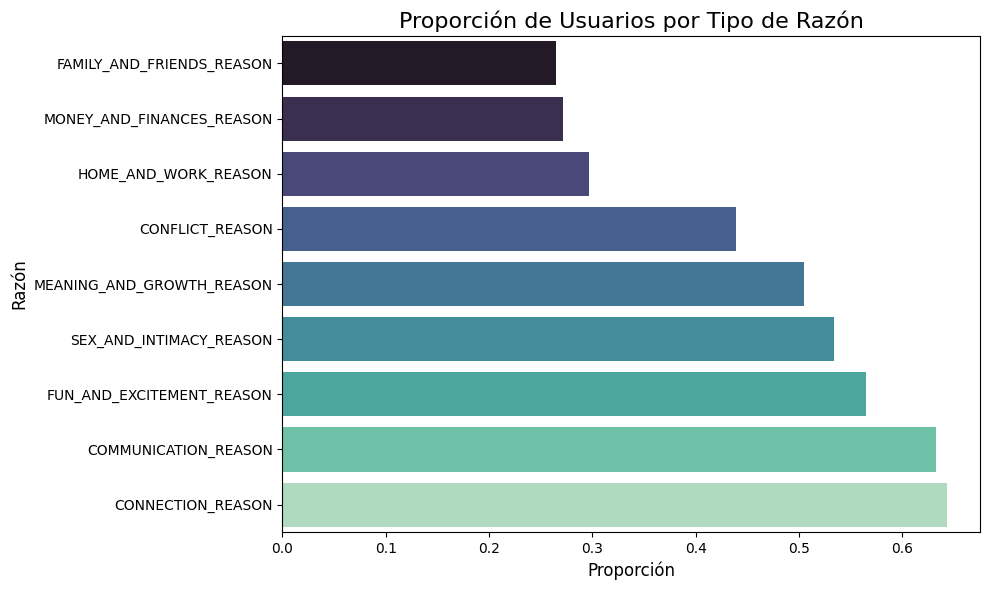

In [7]:
# Lista de columnas con razones
reason_cols = [
    "COMMUNICATION_REASON",
    "CONFLICT_REASON",
    "CONNECTION_REASON",
    "FAMILY_AND_FRIENDS_REASON",
    "FUN_AND_EXCITEMENT_REASON",
    "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON",
    "MONEY_AND_FINANCES_REASON",
    "SEX_AND_INTIMACY_REASON"
]

# Calcular proporción de usuarios que seleccionaron cada razón
reason_counts = df[reason_cols].mean().sort_values(ascending=True).reset_index()
reason_counts.columns = ["Reason", "Proportion"]

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(y="Reason", x="Proportion", data=reason_counts, palette="mako")
plt.title("Proporción de Usuarios por Tipo de Razón", fontsize=16)
plt.xlabel("Proporción", fontsize=12)
plt.ylabel("Razón", fontsize=12)
plt.tight_layout()
plt.show()

- Nos da un resultado que hay mayor cantidad de usuario que obtan por la opción de connection reason.

In [16]:
### Ratio de conversión

# Calcular la tasa de conversión para cada razón
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)


C:\Users\nsara\AppData\Local\Temp\ipykernel_13504\982319074.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")


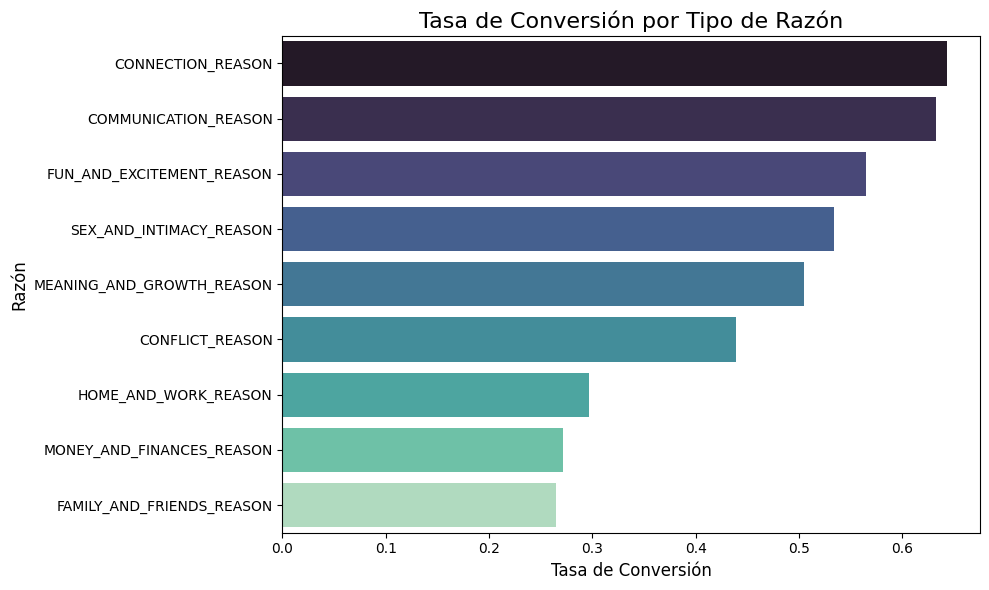

El ratio de conversión total (al menos una razón seleccionada) es: 0.86


In [17]:
# Lista de columnas con razones
reason_cols = [
    "COMMUNICATION_REASON",
    "CONFLICT_REASON",
    "CONNECTION_REASON",
    "FAMILY_AND_FRIENDS_REASON",
    "FUN_AND_EXCITEMENT_REASON",
    "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON",
    "MONEY_AND_FINANCES_REASON",
    "SEX_AND_INTIMACY_REASON"
]

### Ratio de conversión

# Calcular la tasa de conversión para cada razón
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]

# Ordenar las razones por la tasa de conversión de mayor a menor
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)

# Graficar las tasas de conversión
plt.figure(figsize=(10, 6))
sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")
plt.title("Tasa de Conversión por Tipo de Razón", fontsize=16)
plt.xlabel("Tasa de Conversión", fontsize=12)
plt.ylabel("Razón", fontsize=12)
plt.tight_layout()
plt.show()

# Calcular el ratio de conversión total: usuarios que seleccionaron al menos una razón
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

print(f"El ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}")


C:\Users\nsara\AppData\Local\Temp\ipykernel_13504\4044407392.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")


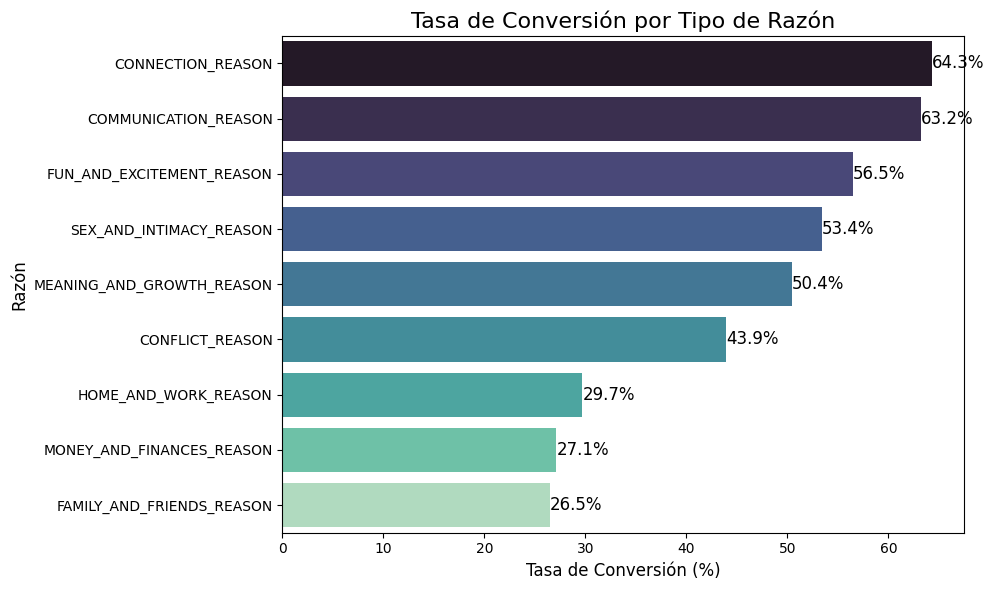

El ratio de conversión total (al menos una razón seleccionada) es: 0.86


In [44]:
# Definir las columnas de razones
reason_cols = [
    "COMMUNICATION_REASON",
    "CONFLICT_REASON",
    "CONNECTION_REASON",
    "FAMILY_AND_FRIENDS_REASON",
    "FUN_AND_EXCITEMENT_REASON",
    "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON",
    "MONEY_AND_FINANCES_REASON",
    "SEX_AND_INTIMACY_REASON"
]

# Calcular la tasa de conversión para cada razón
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]

# Convertir la tasa de conversión en porcentaje
conversion_rates["Conversion Rate"] = conversion_rates["Conversion Rate"] * 100

# Ordenar las razones por la tasa de conversión de mayor a menor
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)

# Graficar las tasas de conversión
plt.figure(figsize=(10, 6))
sns.barplot(y="Reason", x="Conversion Rate", data=conversion_rates, palette="mako")

# Agregar etiquetas de porcentaje sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.1f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center', fontsize=12, color='black')

# Mejorar el título y las etiquetas
plt.title("Tasa de Conversión por Tipo de Razón", fontsize=16)
plt.xlabel("Tasa de Conversión (%)", fontsize=12)
plt.ylabel("Razón", fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Calcular el ratio de conversión total: usuarios que seleccionaron al menos una razón
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

# Mostrar el ratio de conversión total
print(f"El ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}")



In [22]:
# Lista de columnas con razones
reason_cols = [
    "COMMUNICATION_REASON",
    "CONFLICT_REASON",
    "CONNECTION_REASON",
    "FAMILY_AND_FRIENDS_REASON",
    "FUN_AND_EXCITEMENT_REASON",
    "HOME_AND_WORK_REASON",
    "MEANING_AND_GROWTH_REASON",
    "MONEY_AND_FINANCES_REASON",
    "SEX_AND_INTIMACY_REASON"
]

### Ratio de conversión

# Calcular la tasa de conversión para cada razón (en formato decimal)
conversion_rates = df[reason_cols].mean().reset_index()
conversion_rates.columns = ["Reason", "Conversion Rate"]

# Convertir la tasa de conversión a porcentaje
conversion_rates["Conversion Rate"] = conversion_rates["Conversion Rate"] * 100

# Ordenar las razones por la tasa de conversión de mayor a menor
conversion_rates = conversion_rates.sort_values(by="Conversion Rate", ascending=False)

# Mostrar las tasas de conversión
print("Tasa de conversión por razón (%):")
print(conversion_rates)

# Calcular el ratio de conversión total (usuarios que seleccionaron al menos una razón) en porcentaje
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean() * 100

print(f"\nEl ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}%")


Tasa de conversión por razón (%):
                      Reason  Conversion Rate
2          CONNECTION_REASON          64.3100
0       COMMUNICATION_REASON          63.2250
4  FUN_AND_EXCITEMENT_REASON          56.4775
8    SEX_AND_INTIMACY_REASON          53.3825
6  MEANING_AND_GROWTH_REASON          50.4450
1            CONFLICT_REASON          43.9250
5       HOME_AND_WORK_REASON          29.7125
7  MONEY_AND_FINANCES_REASON          27.1300
3  FAMILY_AND_FRIENDS_REASON          26.4525

El ratio de conversión total (al menos una razón seleccionada) es: 86.10%


In [45]:
# Calcular el ratio de conversión total: usuarios que seleccionaron al menos una razón
total_conversion = (df[reason_cols].sum(axis=1) > 0).mean()

print(f"El ratio de conversión total (al menos una razón seleccionada) es: {total_conversion:.2f}")


El ratio de conversión total (al menos una razón seleccionada) es: 0.86


### Cuando empiezas trial los que convierten y las razones

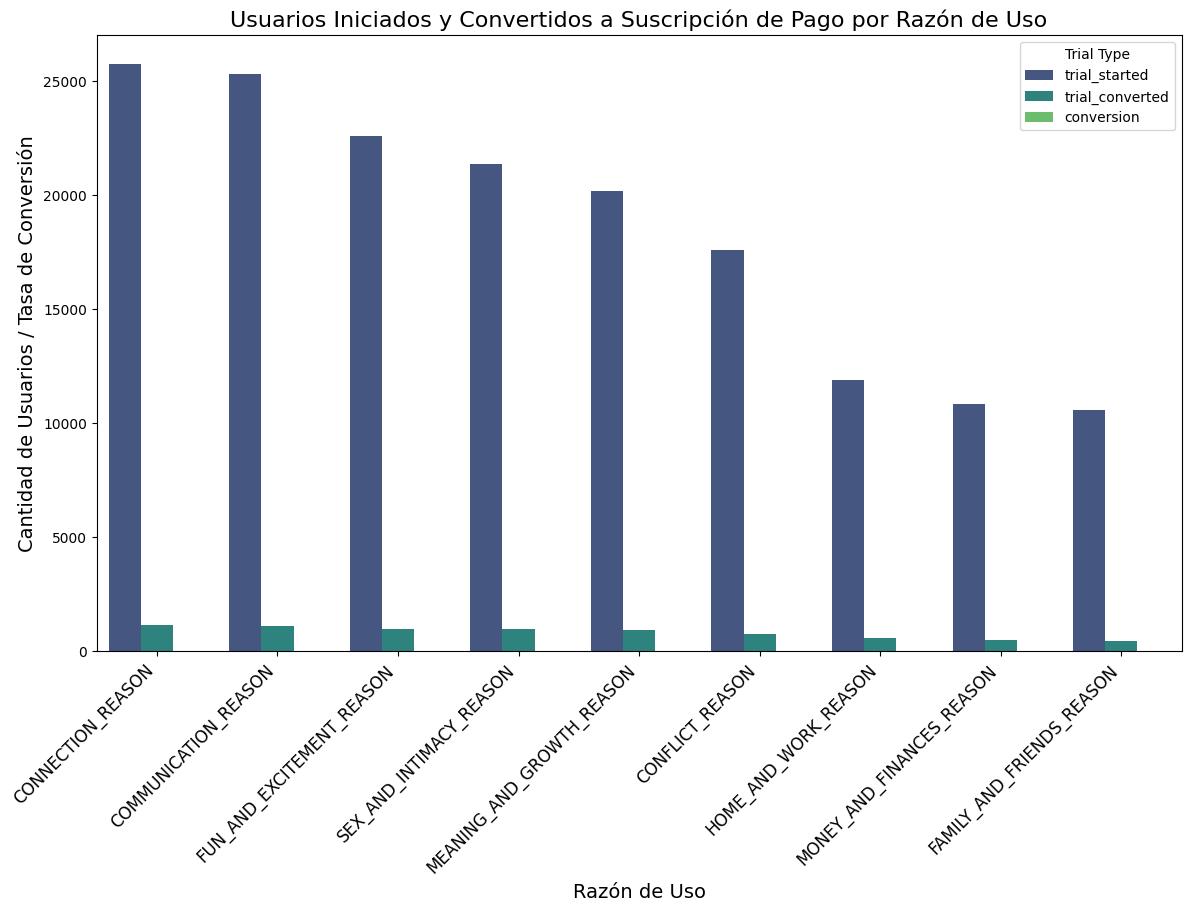

In [37]:
# Calcular la cantidad total de "TRIAL_STARTED" y "TRIAL_CONVERTED" por razón
trial_counts = df_melted.groupby("razon")[["conversion"]].sum().reset_index()
trial_counts["trial_started"] = df_melted.groupby("razon")["conversion"].size().reset_index(drop=True)

# Ordenar de mayor a menor por tasa de conversión
conversion_rates = df_melted.groupby("razon")["conversion"].mean().reset_index()
conversion_rates = conversion_rates.sort_values(by="conversion", ascending=False)
trial_counts = trial_counts.loc[conversion_rates.index]  # Alinear el orden de trial_counts con el de conversion_rates

# Crear un DataFrame combinado con tasas de conversión y las cantidades
conversion_rates["trial_started"] = trial_counts["trial_started"]
conversion_rates["trial_converted"] = trial_counts["conversion"]

# Convertir el DataFrame para tener una columna para cada tipo de prueba y un índice por razón
trial_data_melted = conversion_rates.melt(id_vars="razon", value_vars=["trial_started", "trial_converted", "conversion"],
                                          var_name="Trial Type", value_name="Count")

# Ordenar el DataFrame por la columna 'Count' (esto ordenará también las barras por la tasa de conversión)
trial_data_melted = trial_data_melted.sort_values(by="Count", ascending=False)

# Graficar barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(x="razon", y="Count", hue="Trial Type", data=trial_data_melted, palette="viridis")

# Personalización de la gráfica
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Cantidad de Usuarios / Tasa de Conversión", fontsize=14)
plt.xlabel("Razón de Uso", fontsize=14)
plt.title("Usuarios Iniciados y Convertidos a Suscripción de Pago por Razón de Uso", fontsize=16)

plt.show()




### Las parejas que seleccionan conection reason, comunication reason , fun and excitement, y sex and intimacy tienen mejor ratio de conversión. 


## Hipótesis 2
- Los usuarios que completan todas las pantallas de incorporación (ONBOARDING_COMPLETED) tienen una tasa de conversión a una suscripción de pago (TRIAL_CONVERTED) más alta que aquellos que no completan el onboarding

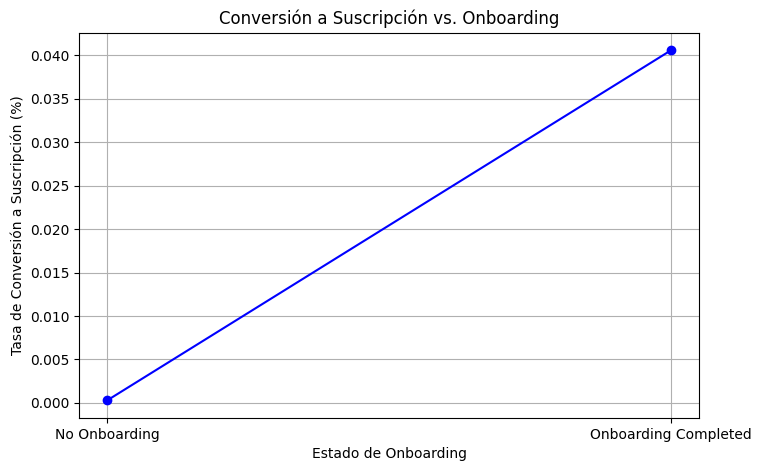

In [17]:
# Definir los valores
conversion_rates = {0: 0.000291, 1: 0.040601} # esto lo he sacado con chatgpt pero no me aclaro

# Crear la gráfica
plt.figure(figsize=(8,5))
plt.plot(conversion_rates.keys(), conversion_rates.values(), marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.xticks([0, 1], ["No Onboarding", "Onboarding Completed"])
plt.xlabel("Estado de Onboarding")
plt.ylabel("Tasa de Conversión a Suscripción (%)")
plt.title("Conversión a Suscripción vs. Onboarding")
plt.grid(True)

# Mostrar la gráfica
plt.show()


### Los resultados muestran que:
- Los usuarios que no completaron el onboarding tienen una tasa de conversión de 0.029%.
- Los usuarios que sí completaron el onboarding tienen una tasa de conversión de 4.06%.

## Hipótesis 3
- La falta de interacción durante el trial de 7 días es directamente proporcional con la cancelación.

Correlación de Pearson: 0.15, p-value: 0.0000


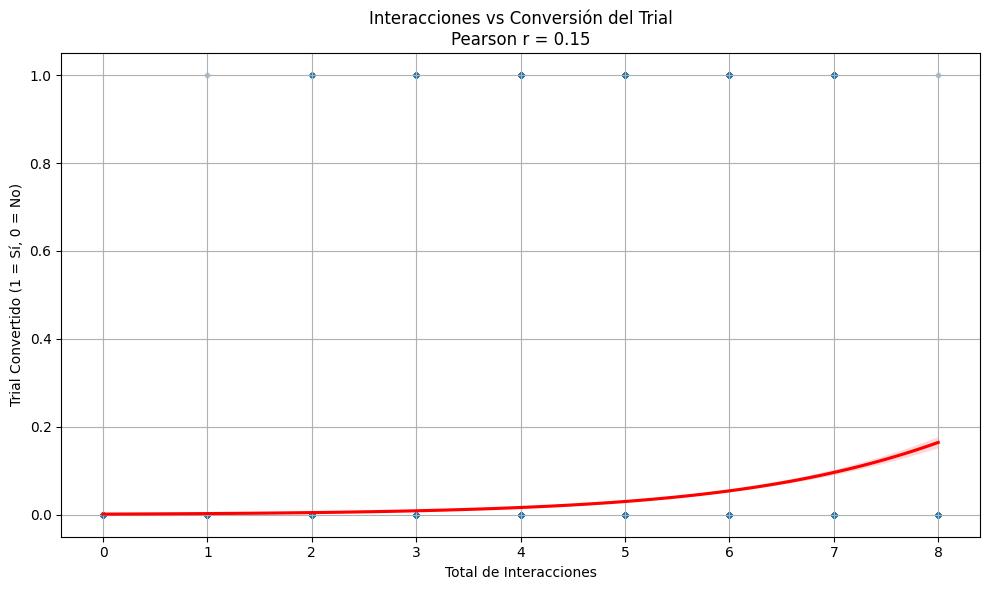

In [3]:
# Definí las columnas de interacción
interaction_columns = [
    'ENGAGED_WITH_PAIRING',
    'CODE_SHARED',
    'PAIRED_SECOND',
    'PAIRED_INITIATOR',
    'ONBOARDING_COMPLETED',
    'CONVERSATION_OPENED',
    'CONVERSATION_ANSWERED',
    'PHOTO_UPLOADED'
]

# Sumá las interacciones
df["TOTAL_INTERACTIONS"] = df[interaction_columns].sum(axis=1)

# Calculá la correlación
correlation, p_value = pearsonr(df["TOTAL_INTERACTIONS"], df["TRIAL_CONVERTED"])
print(f"Correlación de Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

# Hacé la gráfica con regresión logística
plt.figure(figsize=(10, 6))
sns.regplot(
    x="TOTAL_INTERACTIONS", 
    y="TRIAL_CONVERTED", 
    data=df, 
    logistic=True, 
    scatter_kws={'alpha':0.3, 's':10},
    line_kws={'color': 'red'}
)
plt.title(f"Interacciones vs Conversión del Trial\nPearson r = {correlation:.2f}")
plt.xlabel("Total de Interacciones")
plt.ylabel("Trial Convertido (1 = Sí, 0 = No)")
plt.grid(True)
plt.tight_layout()
plt.show()


### revisar esta, no lo veo claro

In [4]:

# Ver las columnas disponibles
print(df.columns)

# Ver la correlación entre interacción y conversión
interaction_cols = ["ENGAGED_WITH_PAIRING", "CODE_SHARED", "PAIRED_SECOND", "PAIRED_INITIATOR"]
correlation = df[interaction_cols + ["TRIAL_CONVERTED"]].corr()
print(correlation["TRIAL_CONVERTED"])


Index(['USER ID', 'FIRST SEEN TIMESTAMP', 'COUNTRY', 'ATTRIBUTION CHANNEL',
       'SIGNUP', 'ENGAGED_WITH_PAIRING', 'CODE_SHARED', 'PAIRED_SECOND',
       'PAIRED_INITIATOR', 'ONBOARDING_COMPLETED', 'CONVERSATION_OPENED',
       'CONVERSATION_ANSWERED', 'PHOTO_UPLOADED', 'TRIAL_STARTED',
       'TRIAL_CONVERTED', 'COMMUNICATION_REASON', 'CONFLICT_REASON',
       'CONNECTION_REASON', 'FAMILY_AND_FRIENDS_REASON',
       'FUN_AND_EXCITEMENT_REASON', 'HOME_AND_WORK_REASON',
       'MEANING_AND_GROWTH_REASON', 'MONEY_AND_FINANCES_REASON',
       'SEX_AND_INTIMACY_REASON', 'TOTAL_INTERACTIONS'],
      dtype='object')
ENGAGED_WITH_PAIRING    0.003275
CODE_SHARED             0.076983
PAIRED_SECOND           0.014027
PAIRED_INITIATOR        0.119002
TRIAL_CONVERTED         1.000000
Name: TRIAL_CONVERTED, dtype: float64


In [5]:
# Definir si un usuario interactuó
df["INTERACTED"] = (df[["ENGAGED_WITH_PAIRING", "CODE_SHARED", "PAIRED_SECOND", "PAIRED_INITIATOR"]].sum(axis=1) > 0).astype(int)

# Ver la tasa de conversión entre usuarios que interactuaron vs. los que no
conversion_rates = df.groupby("INTERACTED")["TRIAL_CONVERTED"].mean()
print(conversion_rates)


INTERACTED
0    0.003432
1    0.036571
Name: TRIAL_CONVERTED, dtype: float64


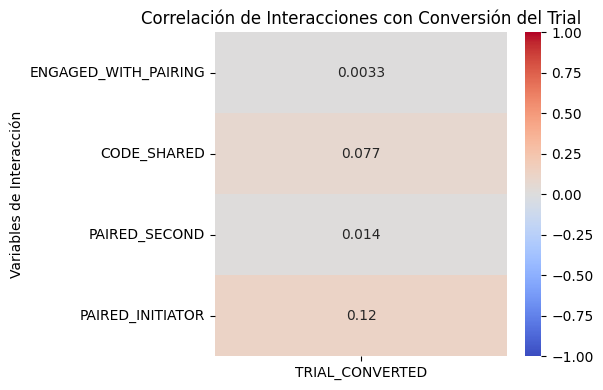

In [6]:
# Definir las columnas de interés
interaction_cols = ["ENGAGED_WITH_PAIRING", "CODE_SHARED", "PAIRED_SECOND", "PAIRED_INITIATOR"]
correlation = df[interaction_cols + ["TRIAL_CONVERTED"]].corr()

# Crear un heatmap solo de las correlaciones con TRIAL_CONVERTED
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation[["TRIAL_CONVERTED"]].loc[interaction_cols], 
    annot=True, cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Correlación de Interacciones con Conversión del Trial")
plt.ylabel("Variables de Interacción")
plt.tight_layout()
plt.show()


### Revisar hipo 3

## Hipótesis 4
- Los usuarios que se registran desde ciertos países tienen una tasa de conversión más alta a la suscripción de pago (TRIAL_CONVERTED) que aquellos que se registran desde otros países.(Evaluar si las tasas de conversión son consistentes en todos los países, identificando posibles diferencias regionales)

In [ ]:
# Número de usuarios por pais

usuarios_por_pais = df["COUNTRY"].value_counts()
print(usuarios_por_pais)

COUNTRY
United States     30382
United Kingdom     2537
Canada             1727
France             1322
Australia          1259
India              1017
Germany             987
South Africa        493
New Zealand         276
Name: count, dtype: int64


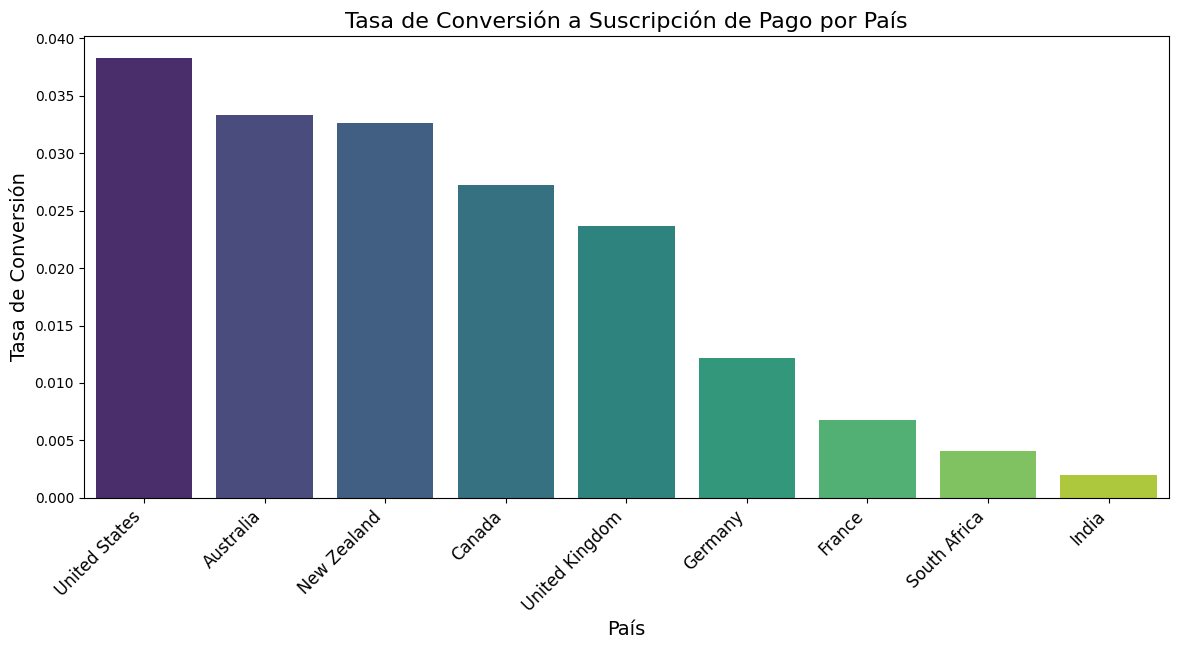

In [11]:
# Calcular la tasa de conversión por país
conversion_rates = df.groupby("COUNTRY")["TRIAL_CONVERTED"].mean().reset_index()

# Ordenar de mayor a menor
conversion_rates = conversion_rates.sort_values(by="TRIAL_CONVERTED", ascending=False)

# Graficar tasas de conversión por país
plt.figure(figsize=(14,6))
sns.barplot(x="COUNTRY", y="TRIAL_CONVERTED", data=conversion_rates, hue="COUNTRY",  palette="viridis")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Tasa de Conversión", fontsize=14)
plt.xlabel("País", fontsize=14)
plt.title("Tasa de Conversión a Suscripción de Pago por País", fontsize=16)

plt.show()




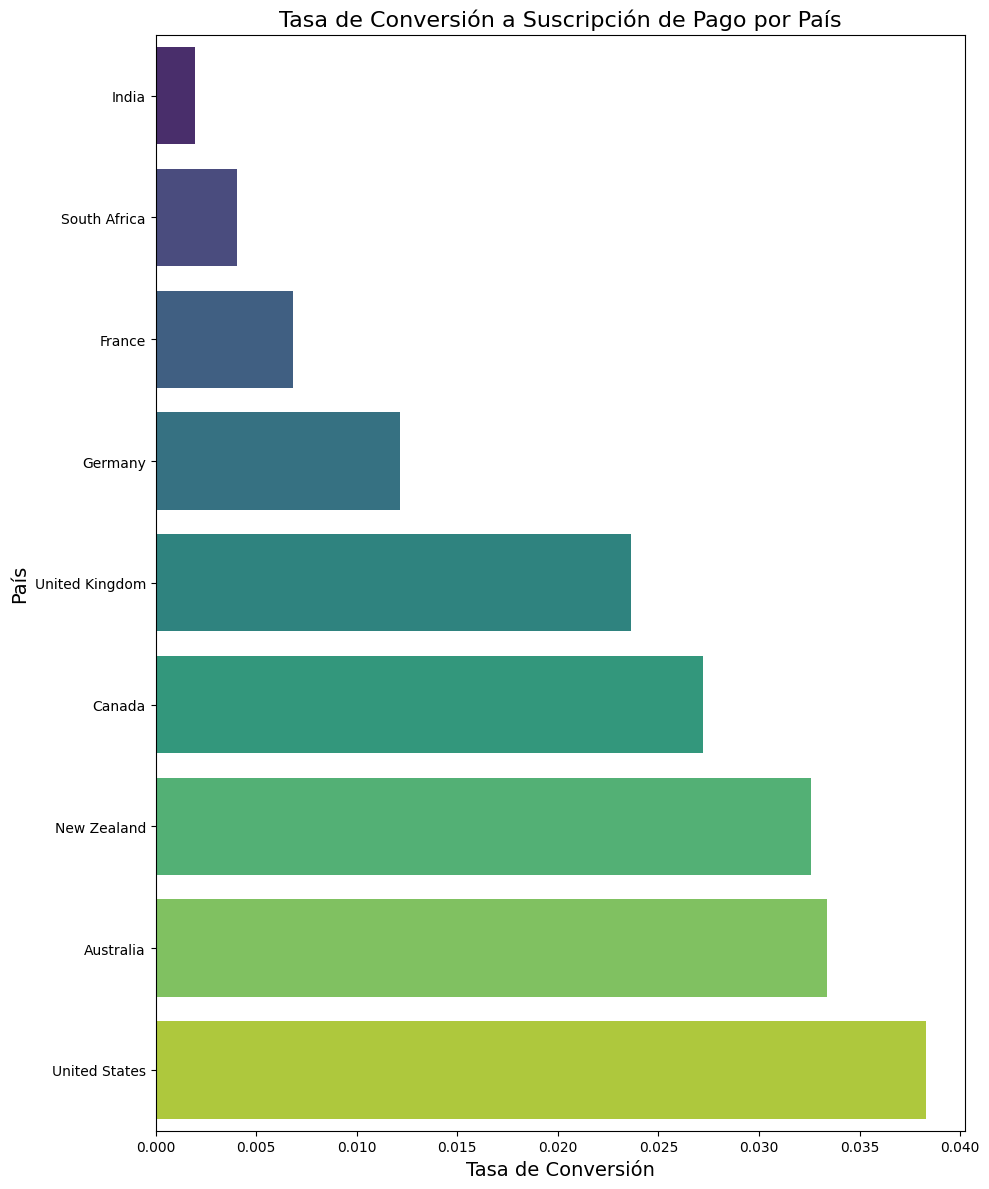

In [ ]:
# Calcular la tasa de conversión por país
conversion_rates = df.groupby("COUNTRY")["TRIAL_CONVERTED"].mean().reset_index()

# Ordenar de mayor a menor
conversion_rates = conversion_rates.sort_values(by="TRIAL_CONVERTED", ascending=True)  # Ascendente para horizontal

# Gráfico de barras horizontales
plt.figure(figsize=(10, 12))
sns.barplot(
    y="COUNTRY", 
    x="TRIAL_CONVERTED", 
    hue="COUNTRY",  
    data=conversion_rates, 
    palette="viridis", 
    legend=False
)
plt.xlabel("Tasa de Conversión", fontsize=14)
plt.ylabel("País", fontsize=14)
plt.title("Tasa de Conversión a Suscripción de Pago por País", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Mostrarlo en un mapa con folium

# Datos de países y sus valores
country_data = {
    'United States': 30382,
    'United Kingdom': 2537,
    'Canada': 1727,
    'France': 1322,
    'Australia': 1259,
    'India': 1017,
    'Germany': 987,
    'South Africa': 493,
    'New Zealand': 276
}

# Coordenadas aproximadas de los países (latitud, longitud)
coordinates = {
    'United States': [37.0902, -95.7129],
    'United Kingdom': [51.5074, -0.1278],
    'Canada': [56.1304, -106.3468],
    'France': [46.6034, 1.8883],
    'Australia': [-25.2744, 133.7751],
    'India': [20.5937, 78.9629],
    'Germany': [51.1657, 10.4515],
    'South Africa': [-30.5595, 22.9375],
    'New Zealand': [-40.9006, 174.8869]
}

# Crear un mapa centrado en el mundo
m = folium.Map(location=[0, 0], zoom_start=2)

# Agregar un marcador para cada país
for country, value in country_data.items():
    lat, lon = coordinates[country]
    folium.Marker(
        [lat, lon],
        popup=f'{country}: {value}',
        icon=folium.Icon(color='purple', icon='info-sign')
    ).add_to(m)

m
# Mostrar el mapa
# m.save("mapa_interactivo.html")




### Trial started + trial converted y los paises. Con los porcentajes.

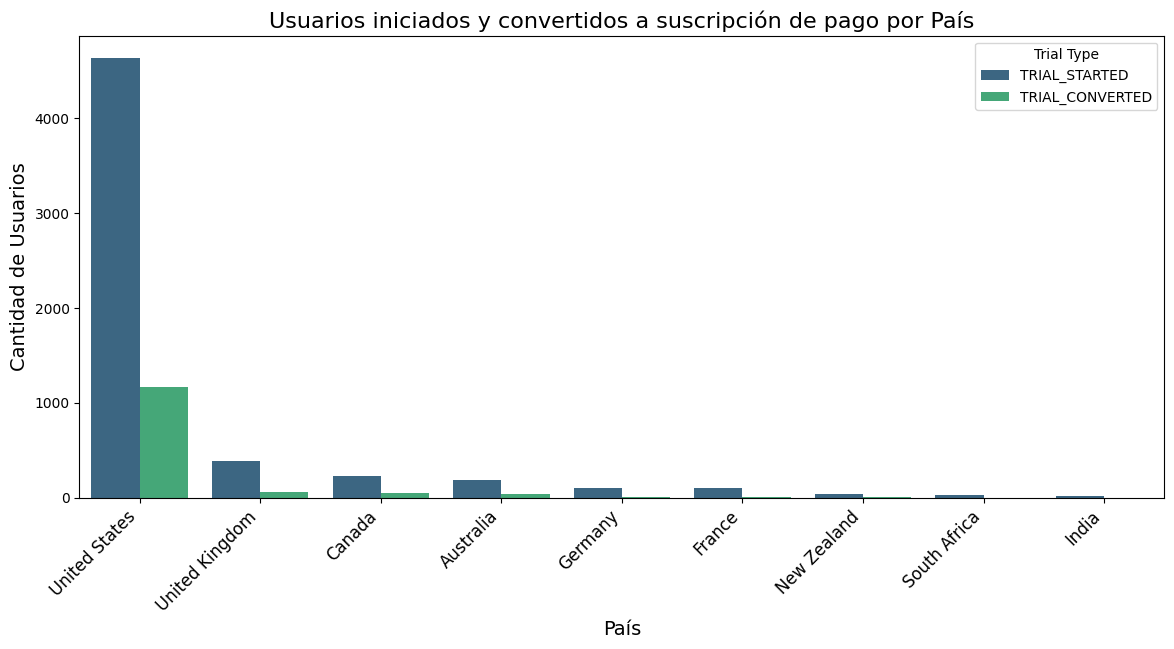

In [34]:
# Calcular la cantidad total de "TRIAL_STARTED" y "TRIAL_CONVERTED" por país
trial_data = df.groupby("COUNTRY")[["TRIAL_STARTED", "TRIAL_CONVERTED"]].sum().reset_index()

# Convertir el DataFrame para tener una columna para cada tipo de prueba y un índice por país
trial_data_melted = trial_data.melt(id_vars="COUNTRY", value_vars=["TRIAL_STARTED", "TRIAL_CONVERTED"],
                                    var_name="Trial Type", value_name="Count")

# Ordenar el DataFrame por la columna 'Count' en orden descendente
trial_data_melted = trial_data_melted.sort_values(by="Count", ascending=False)

# Graficar barras agrupadas
plt.figure(figsize=(14,6))
sns.barplot(x="COUNTRY", y="Count", hue="Trial Type", data=trial_data_melted, palette="viridis")

# Personalización de la gráfica
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Cantidad de Usuarios", fontsize=14)
plt.xlabel("País", fontsize=14)
plt.title("Usuarios iniciados y convertidos a suscripción de pago por País", fontsize=16)

plt.show()





- Tenemos en primer lugar a United States y en segundo lugar a United Kingdom, seguidos como muy poca diferencia de Canada y Australia.

## Hipótesis 4
 -  Los usuarios que provienen de canales de marketing orgánicos tienen mayor probabilidad de conversión

In [ ]:
# cuantos usuarios y cuantos canales de conversion

# Contar la cantidad de usuarios en cada canal de conversión
channel_counts = df["ATTRIBUTION CHANNEL"].value_counts()
print(channel_counts)


ATTRIBUTION CHANNEL
Organic             11054
Google Ads           9801
Partner Invite       8882
Facebook             6012
TikTok               2836
Apple Search Ads     1415
Name: count, dtype: int64


### Canales de marketing

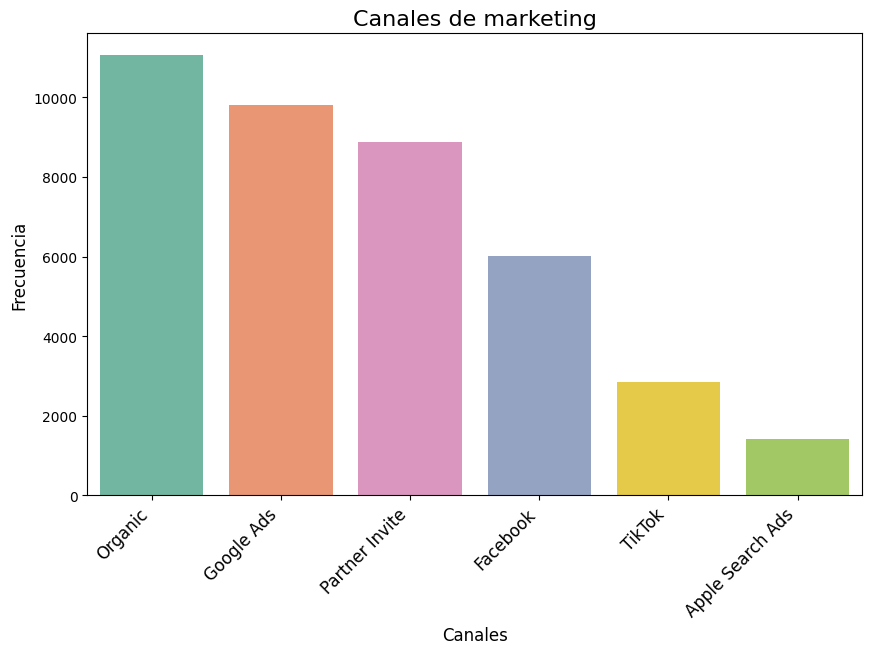

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))

# Ordenar los canales por frecuencia
orden_canales = df['ATTRIBUTION CHANNEL'].value_counts().index

# Crear el gráfico ordenado con hue asignado y legend desactivado
sns.countplot(data=df, x='ATTRIBUTION CHANNEL', hue='ATTRIBUTION CHANNEL', 
              palette='Set2', order=orden_canales, legend=False)

# Girar las etiquetas del eje X
plt.xticks(rotation=45, ha="right", fontsize=12)

# Añadir título y etiquetas
plt.title("Canales de marketing", fontsize=16)
plt.xlabel("Canales", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)  # Añadir etiqueta al eje Y para mayor claridad

plt.show()


## Tasa de conversión

ATTRIBUTION CHANNEL
Apple Search Ads    0.068551
Partner Invite      0.039180
Organic             0.033924
Facebook            0.033766
TikTok              0.032087
Google Ads          0.023773
Name: TRIAL_CONVERTED, dtype: float64


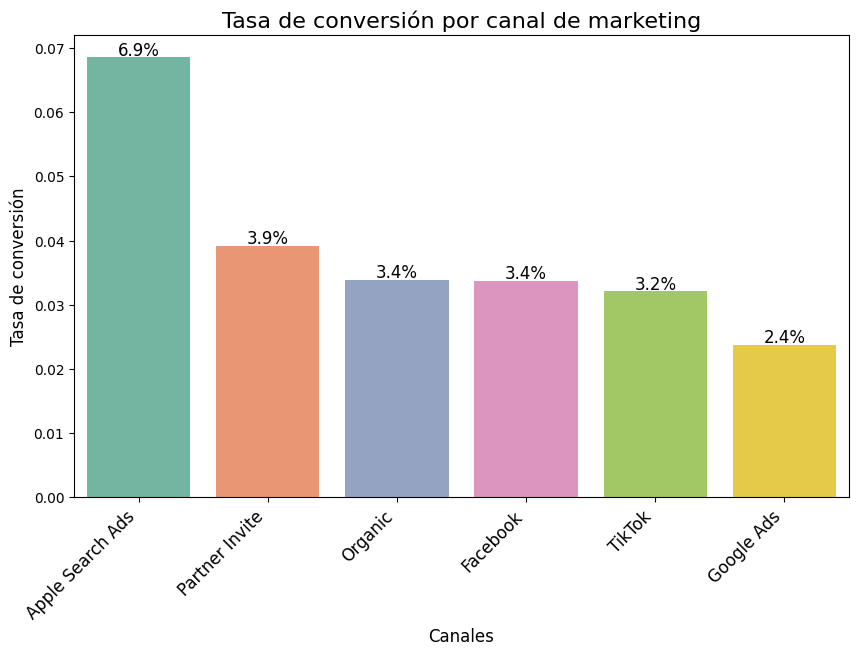

In [ ]:
# Calcular la tasa de conversión por canal
conversion_rates = df.groupby('ATTRIBUTION CHANNEL')['TRIAL_CONVERTED'].mean().sort_values(ascending=False)

# Imprimir las tasas de conversión por canal
print(conversion_rates)

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras con la tasa de conversión y asignar 'hue' a 'x'
ax = sns.barplot(x=conversion_rates.index, y=conversion_rates.values, hue=conversion_rates.index, palette='Set2', legend=False)

# Girar las etiquetas del eje X
plt.xticks(rotation=45, ha="right", fontsize=12)

# Añadir título y etiquetas
plt.title("Tasa de conversión por canal de marketing", fontsize=16)
plt.xlabel("Canales", fontsize=12)
plt.ylabel("Tasa de conversión", fontsize=12)

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()



### Hipótesis 5
- Los usuarios que suben una foto (PHOTO_UPLOADED) tienen una tasa de conversión más alta a suscripción de pago que aquellos que no suben una foto

In [ ]:
# de esos 40000 cuantos suben fotos. ESo está relacionado? Es importante?

# Filtrar usuarios que han subido foto de perfil 
usuarios_con_foto = df[df['PHOTO_UPLOADED'] == True]  # O 'foto_perfil' == 1 si es un valor binario
total_usuarios_con_foto = usuarios_con_foto['USER ID'].nunique()

print(f"Total de usuarios que subieron foto de perfil: {total_usuarios_con_foto}")


Total de usuarios que subieron foto de perfil: 24822


### Usuarios con foto y usuarios sin foto

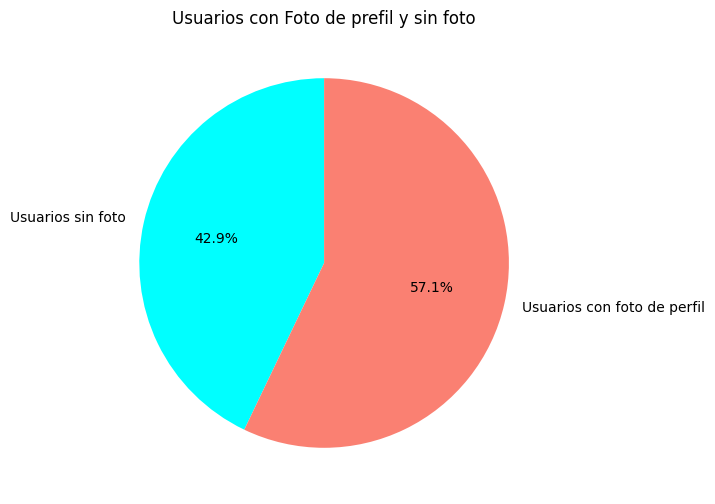

In [ ]:
# Datos para el gráfico
labels = ['Usuarios sin foto', 'Usuarios con foto de perfil']
conversion_rates = [tasa_conversion_total, tasa_conversion_con_foto]

# Crear gráfico de torta (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(conversion_rates, labels=labels, autopct='%1.1f%%', colors=['cyan', 'salmon'], startangle=90)

# Añadir título
plt.title('Usuarios con Foto de prefil y sin foto')

# Mostrar el gráfico
plt.show()

### Tasa de conversión

In [ ]:
# Tasa de conversión total (GRAFICAR ESTO)
tasa_conversion_total = df['TRIAL_CONVERTED'].mean()  # Promedio de la columna 'conversion', 1 es convertido, 0 no

# Tasa de conversión para usuarios que subieron foto de perfil
tasa_conversion_con_foto = usuarios_con_foto['TRIAL_CONVERTED'].mean()

print(f"Tasa de conversión total: {tasa_conversion_total * 100:.2f}%")
print(f"Tasa de conversión para usuarios con foto de perfil: {tasa_conversion_con_foto * 100:.2f}%")

Tasa de conversión total: 3.37%
Tasa de conversión para usuarios con foto de perfil: 4.48%


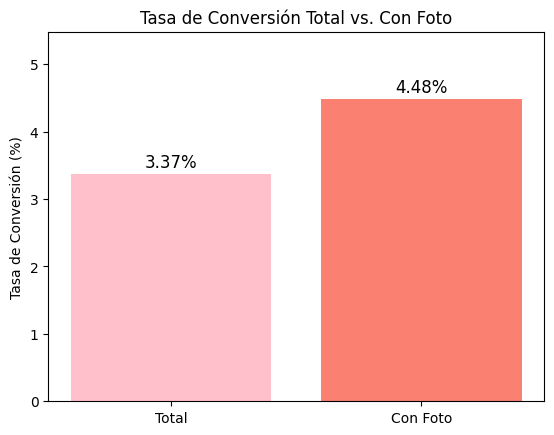

In [ ]:
# Datos en porcentaje
categorias = ['Total', 'Con Foto']
conversiones = [tasa_conversion_total * 100, tasa_conversion_con_foto * 100]  # Convertimos a porcentaje

# Crear la gráfica
plt.bar(categorias, conversiones, color=['pink', 'salmon'])

# Añadir etiquetas y título
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión Total vs. Con Foto')
plt.ylim(0, max(conversiones) + 1)  # Ajustamos el límite del eje Y

# Mostrar valores sobre las barras
for i, v in enumerate(conversiones):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=12)

# Mostrar gráfico
plt.show()




---

### Hipótesis 6
- Los usuarios que han abierto y respondido una conversación (CONVERSATION_OPENED y CONVERSATION_ANSWERED) tienen una tasa de conversión más alta a una suscripción de pago (TRIAL_CONVERTED) en comparación con aquellos que no han abierto ni respondido conversaciones

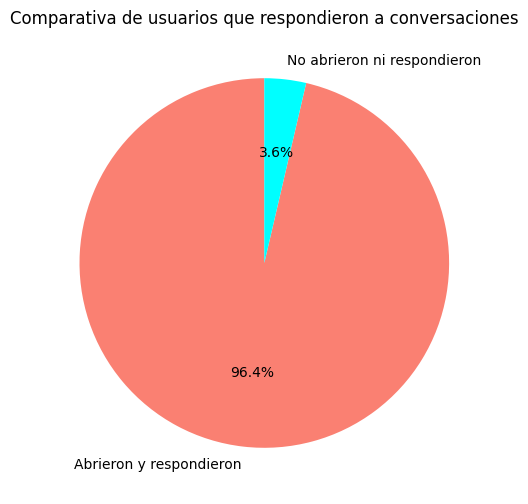

Tasa de conversión (Abrieron y respondieron): 5.73%
Tasa de conversión (No abrieron ni respondieron): 0.22%


In [ ]:
# Filtrar Grupo 1: Usuarios que abrieron y respondieron conversaciones
usuarios_activos = df[(df['CONVERSATION_OPENED'] == True) & (df['CONVERSATION_ANSWERED'] == True)]
tasa_conversion_activos = usuarios_activos['TRIAL_CONVERTED'].mean()

# Filtrar Grupo 2: Usuarios que NO abrieron ni respondieron conversaciones
usuarios_inactivos = df[(df['CONVERSATION_OPENED'] == False) & (df['CONVERSATION_ANSWERED'] == False)]
tasa_conversion_inactivos = usuarios_inactivos['TRIAL_CONVERTED'].mean()

# Crear gráfico de pastel (Pie Chart)
labels = ['Abrieron y respondieron', 'No abrieron ni respondieron']
conversion_rates = [tasa_conversion_activos, tasa_conversion_inactivos]

plt.figure(figsize=(8, 6))
plt.pie(conversion_rates, labels=labels, autopct='%1.1f%%', colors=['salmon', 'cyan'], startangle=90)

# Añadir título
plt.title('Comparativa de usuarios que respondieron a conversaciones')

# Mostrar el gráfico
plt.show()

# Imprimir tasas de conversión en consola
print(f"Tasa de conversión (Abrieron y respondieron): {tasa_conversion_activos * 100:.2f}%")
print(f"Tasa de conversión (No abrieron ni respondieron): {tasa_conversion_inactivos * 100:.2f}%")



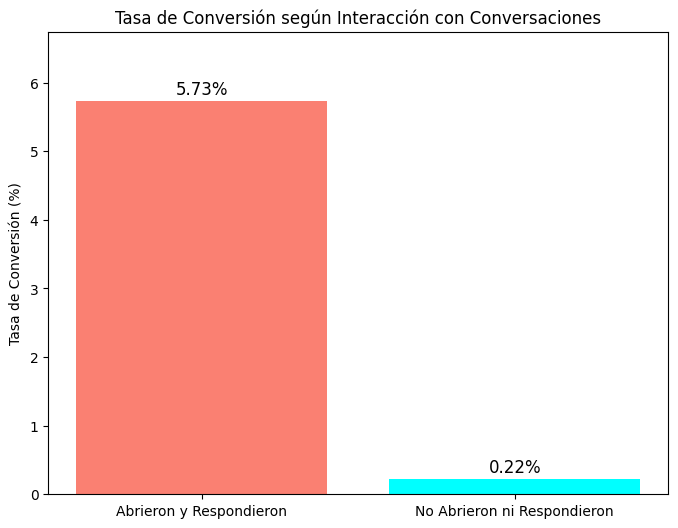

In [ ]:

# Datos en porcentaje
categorias = ['Abrieron y Respondieron', 'No Abrieron ni Respondieron']
conversiones = [tasa_conversion_activos * 100, tasa_conversion_inactivos * 100]  # Convertimos a porcentaje

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.bar(categorias, conversiones, color=['salmon', 'cyan'])

# Añadir etiquetas y título
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión según Interacción con conversaciones')
plt.ylim(0, max(conversiones) + 1)  # Ajustamos el límite del eje Y

# Mostrar valores sobre las barras
for i, v in enumerate(conversiones):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=12)

# Mostrar gráfico
plt.show()


### Hipótesis 7

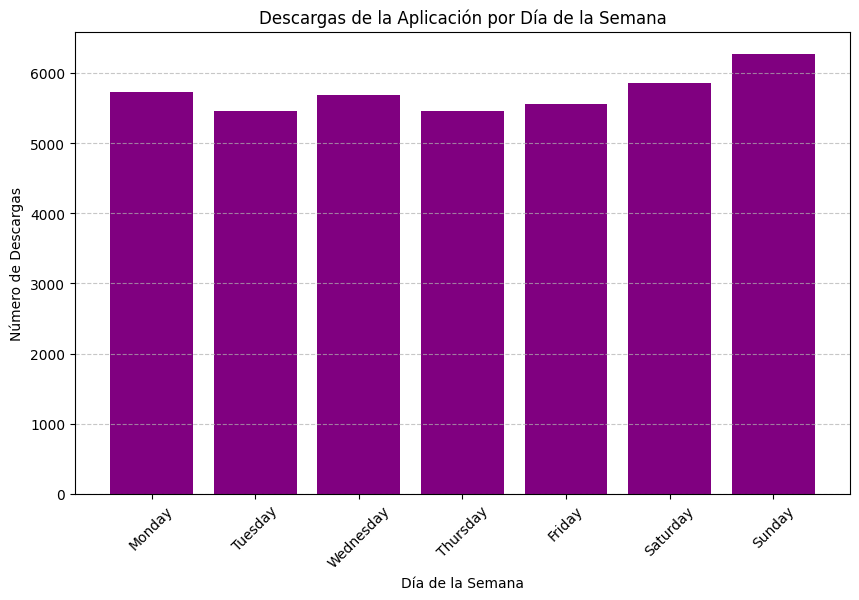

In [ ]:
#  Contar las descargas por día y visualizarlas en un gráfico de barras


# Convertir la columna a formato datetime
# pd.to_datetime() de pandas convierte los valores de texto a objetos de tipo datetime.
df['FIRST SEEN TIMESTAMP'] = pd.to_datetime(df['FIRST SEEN TIMESTAMP'])

# Extraer el día de la semana
df['DAY_OF_WEEK'] = df['FIRST SEEN TIMESTAMP'].dt.day_name() # te devuelve el día de la semana

# Contar las descargas por día de la semana
download_counts = df['DAY_OF_WEEK'].value_counts()

# Ordenar los días en el orden correcto
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
download_counts = download_counts.reindex(days_order) # esto asegura que los días aparezcan en el orden habitual, en lugar de un orden basado en frecuencia.

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(download_counts.index, download_counts.values, color='purple')

# Etiquetas y título
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Descargas")
plt.title("Descargas de la Aplicación por Día de la Semana")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [ ]:


# Convertir la columna a datetime
df['FIRST SEEN TIMESTAMP'] = pd.to_datetime(df['FIRST SEEN TIMESTAMP'])

# Extraer el día de la semana
df['DAY_OF_WEEK'] = df['FIRST SEEN TIMESTAMP'].dt.day_name()

# Contar descargas por día
download_counts = df['DAY_OF_WEEK'].value_counts()

# Ordenar los días correctamente
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
download_counts = download_counts.reindex(days_order).dropna()

# Crear pie chart con Plotly
fig = go.Figure(data=[go.Pie(
    labels=download_counts.index,
    values=download_counts.values,
    hole=0.5,  # Para hacer un donut chart (0.3 es el tamaño del agujero)
    hoverinfo="label+percent",
    textinfo="label+percent"
)])

fig.update_layout(
    title="DISTRIBUCIÓN DE DESCARGAS POR DÍA DE LA SEMANA",
    annotations=[{
        "font": {"size": 20},
        "showarrow": False,
        "text": "DESCARGAS",
        "x": 0.5,
        "y": 1.1
    }]
)

fig.show()


### Hipótesis
- Análisis de los usuarios según su país de procedencia y los canales que utilizan para acceder a la aplicación.

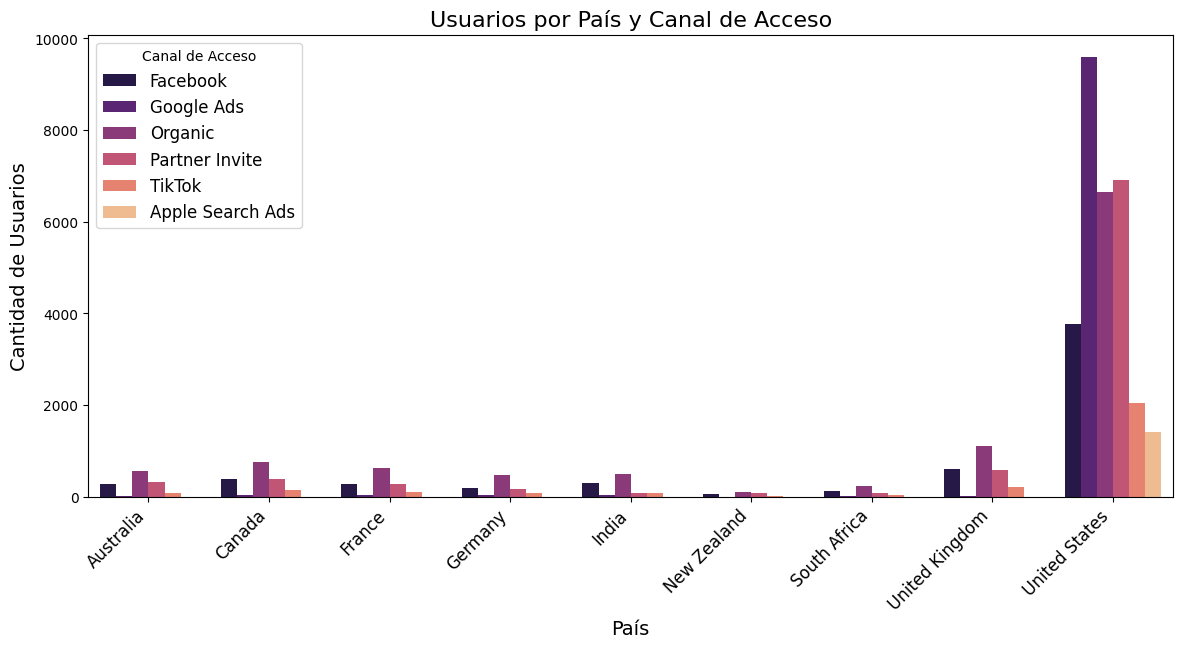

In [ ]:
# Filtrar por pais y canal de distribución


# Agrupar datos: Número de usuarios por país y canal
usuarios_por_pais_canal = df.groupby(["COUNTRY", "ATTRIBUTION CHANNEL"]).size().reset_index(name="COUNT")

# Gráfico de barras agrupado
plt.figure(figsize=(14,6))
sns.barplot(x="COUNTRY", y="COUNT", hue="ATTRIBUTION CHANNEL", data=usuarios_por_pais_canal, palette="magma")

# Ajustes del gráfico
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Cantidad de Usuarios", fontsize=14)
plt.xlabel("País", fontsize=14)
plt.title("Usuarios por País y Canal de Acceso", fontsize=16)
plt.legend(title="Canal de Acceso", fontsize=12)

# Mostrar gráfico
plt.show()
